In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
import warnings

In [2]:
data=pd.read_csv("/content/creditcard.csv")

<ipython-input-2-a552747273d3>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/creditcard.csv")


In [3]:
data.shape

(33760, 31)

In [5]:
data.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

In [8]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [9]:
print(data.duplicated().sum())

137


In [10]:
duplicates = data.duplicated()
# Get the indices of duplicated rows
duplicate_indices = data[duplicates].index
print("Indices of duplicated rows:", duplicate_indices)

Indices of duplicated rows: Index([   33,    35,   113,   114,   115,   221,   223,  1178,  1180,  1382,
       ...
       31637, 31639, 31848, 31850, 31854, 31856, 31983, 31985, 32955, 32957],
      dtype='int64', length=137)


In [11]:
data= data.drop_duplicates()

In [12]:
data.shape

(33623, 31)

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
count,33623.000000,33623.000000,33623.000000,33623.000000,33623.000000,33623.000000,33623.000000,33623.000000,33623.000000,33623.000000,...,33623.000000,33623.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000
mean,23186.565506,-0.207517,0.086288,0.718424,0.202787,-0.214608,0.091154,-0.117287,0.032160,0.283423,...,0.045557,-0.033378,-0.042714,0.008771,0.134916,0.022639,0.013608,0.003782,83.241498,0.003063
std,12303.967821,1.846662,1.544320,1.567575,1.414397,1.398659,1.313015,1.271519,1.252092,1.243633,...,0.671874,0.770365,0.544836,0.592057,0.435859,0.507370,0.383418,0.303383,228.242968,0.055265
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-13.694584,-20.262054,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,11328.500000,-0.954093,-0.484189,0.249621,-0.707509,-0.812583,-0.648464,-0.596854,-0.156739,-0.508775,...,-0.160365,-0.240948,-0.177787,-0.325263,-0.128613,-0.331656,-0.062472,-0.007085,6.955000,0.000000
50%,28247.000000,-0.239453,0.124562,0.835559,0.191621,-0.250103,-0.167005,-0.071160,0.041003,0.162177,...,-0.021710,-0.084263,-0.051522,0.062681,0.174173,-0.060705,0.009056,0.021015,21.110000,0.000000
75%,33552.000000,1.162986,0.763885,1.460570,1.085030,0.303901,0.476830,0.440196,0.302194,1.025562,...,0.165903,0.091738,0.075378,0.398524,0.419997,0.301272,0.088527,0.076431,75.080000,0.000000
max,37373.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,17.281859,22.614889,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


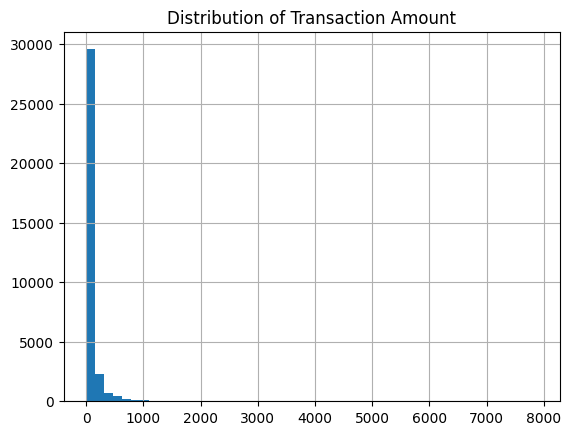

Text(0.5, 1.0, 'Distribution of Transaction Time')

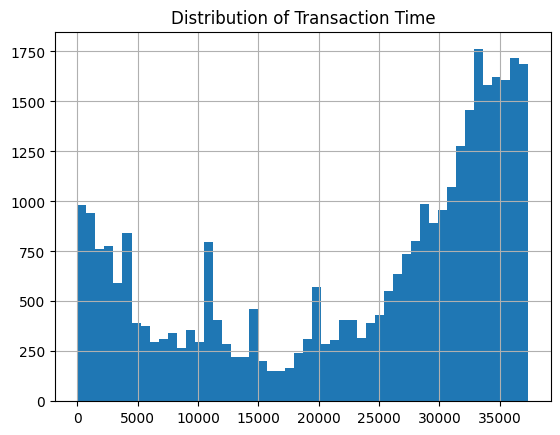

In [14]:
data['Amount'].hist(bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

data['Time'].hist(bins=50)
plt.title('Distribution of Transaction Time')

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

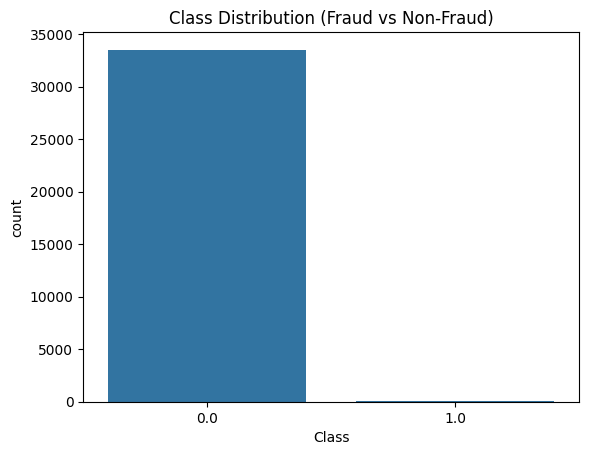

In [15]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

Text(0.5, 1.0, 'Box Plot for Transaction Time')

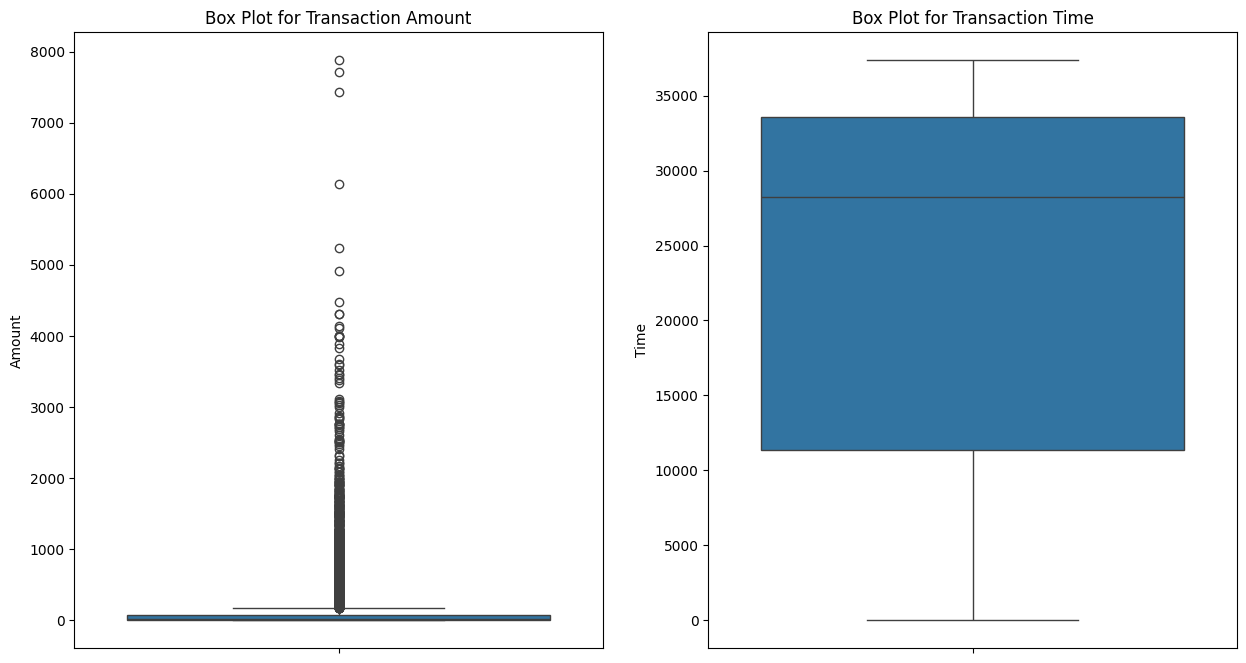

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(y='Amount', data=data, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=data, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

Text(0.5, 1.0, 'Transaction Time by Class')

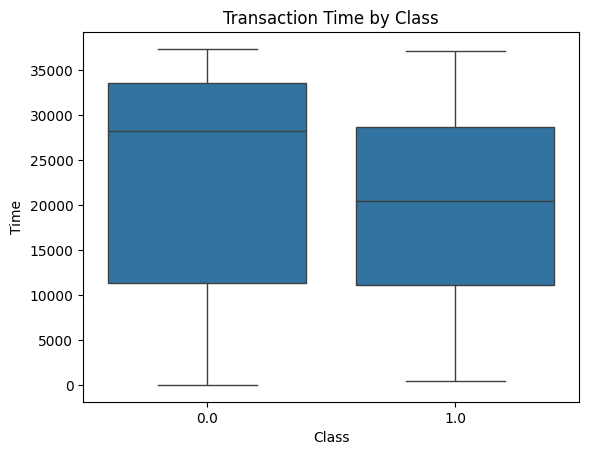

In [17]:
sns.boxplot(x='Class', y='Time', data=data)
plt.title("Transaction Time by Class")

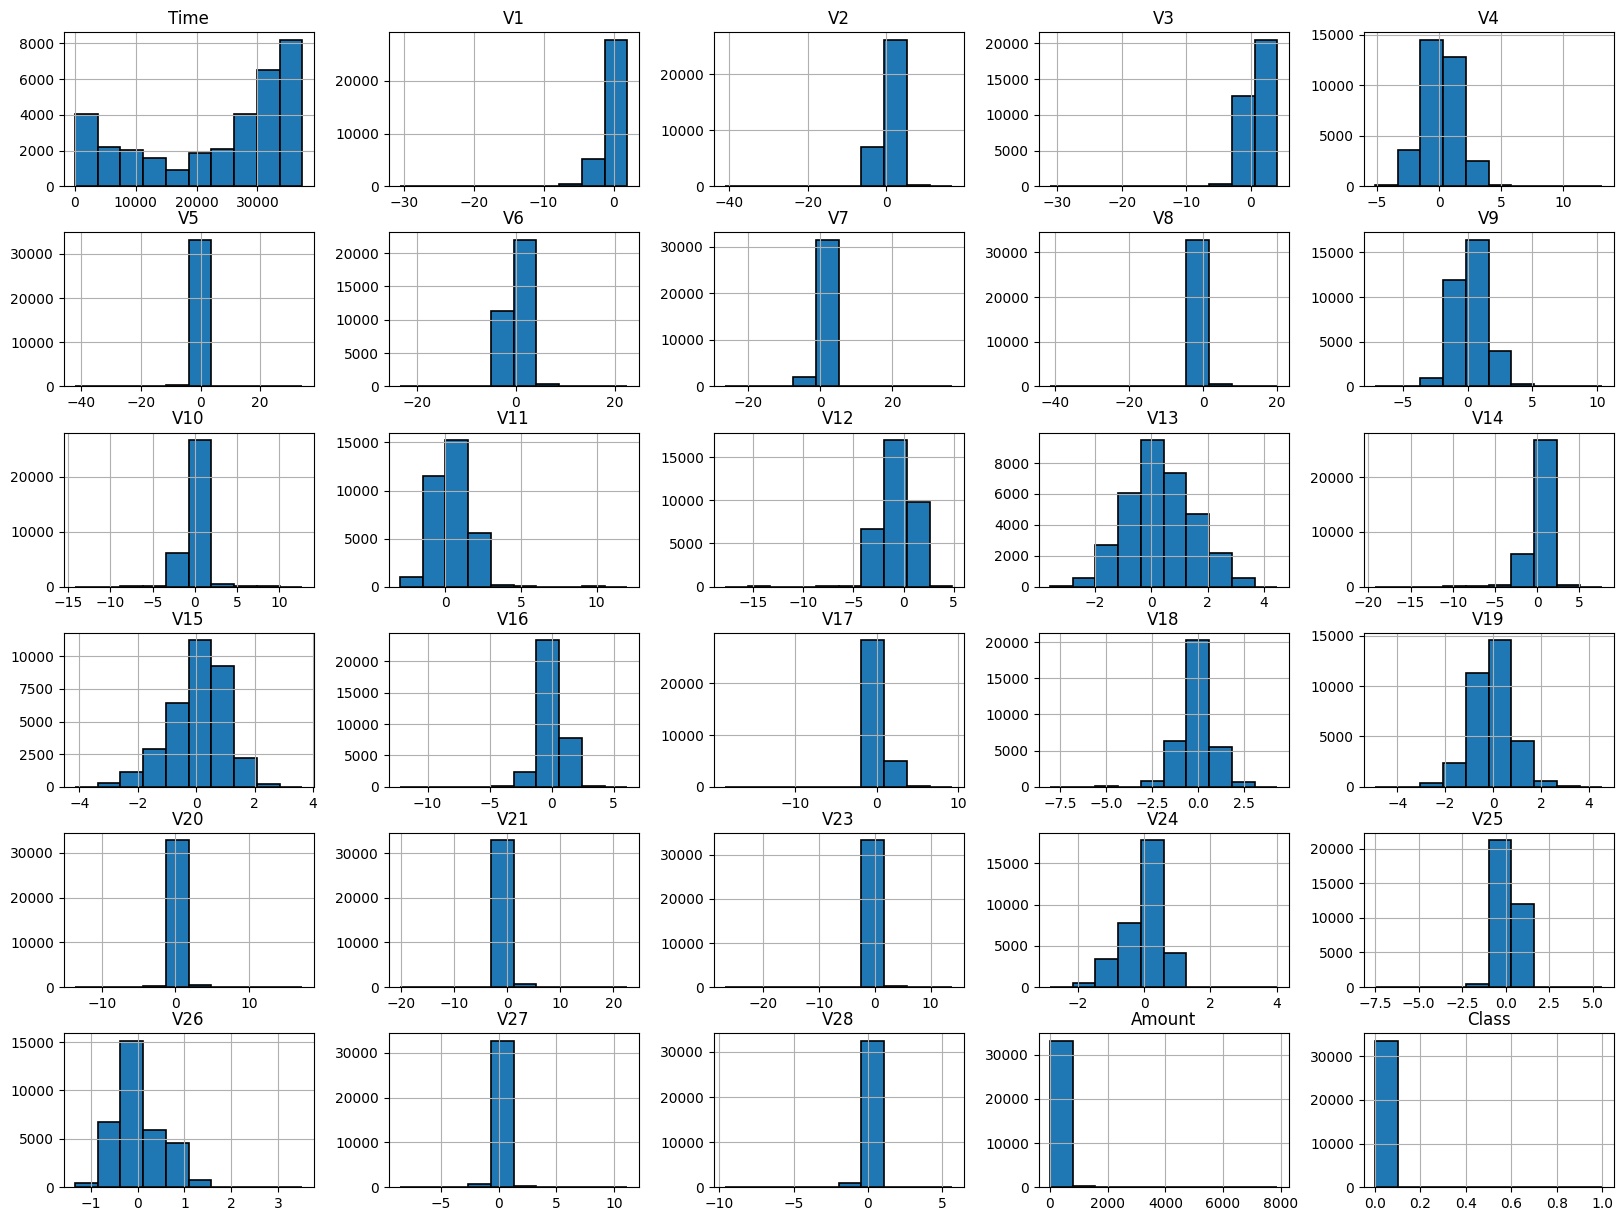

In [18]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

Text(0.5, 1.0, 'Amount Distributions: Fraud vs Non-Fraud')

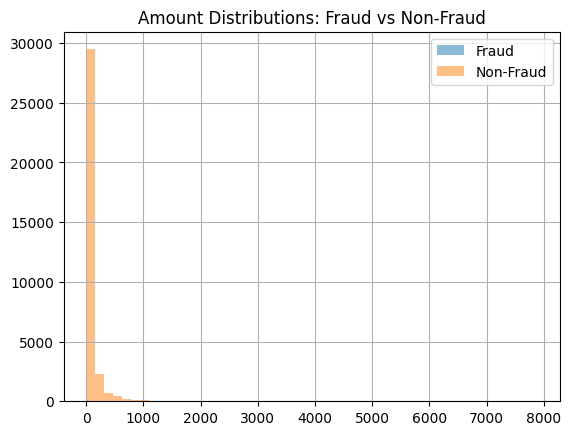

In [19]:
fraud =data[data['Class'] == 1]
non_fraud =data[data['Class'] == 0]

fraud['Amount'].hist(alpha=0.5, label='Fraud', bins=50)
non_fraud['Amount'].hist(alpha=0.5, label='Non-Fraud', bins=50)
plt.legend()
plt.title('Amount Distributions: Fraud vs Non-Fraud')

Text(0.5, 1.0, 'Time Distributions: Fraud vs Non-Fraud')

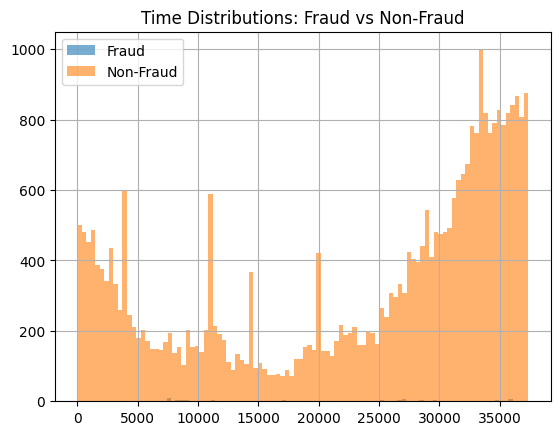

In [20]:
fraud['Time'].hist(alpha=0.6, label='Fraud', bins=100)
non_fraud['Time'].hist(alpha=0.6, label='Non-Fraud', bins=100)
plt.legend()
plt.title('Time Distributions: Fraud vs Non-Fraud')

Text(0.5, 1.0, 'Scatter plot between V1 and V2 (colored by Class)')

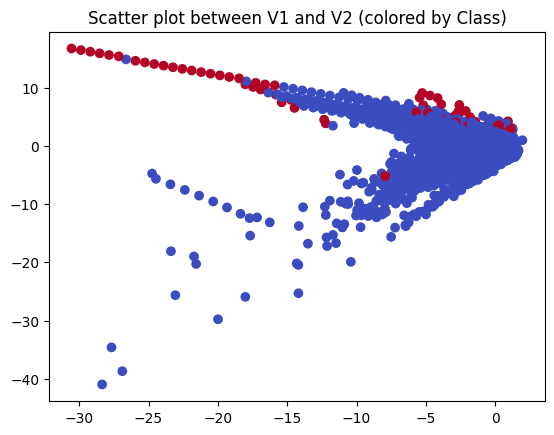

In [21]:
plt.scatter(data['V1'], data['V2'], c=data['Class'], cmap='coolwarm')
plt.title('Scatter plot between V1 and V2 (colored by Class)')

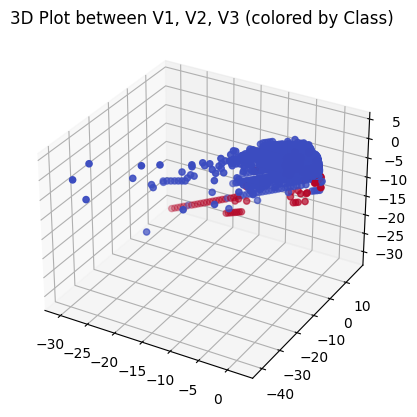

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['V1'], data['V2'], data['V3'], c=data['Class'], cmap='coolwarm')
plt.title('3D Plot between V1, V2, V3 (colored by Class)')
plt.show()

In [26]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot for Transaction Time')

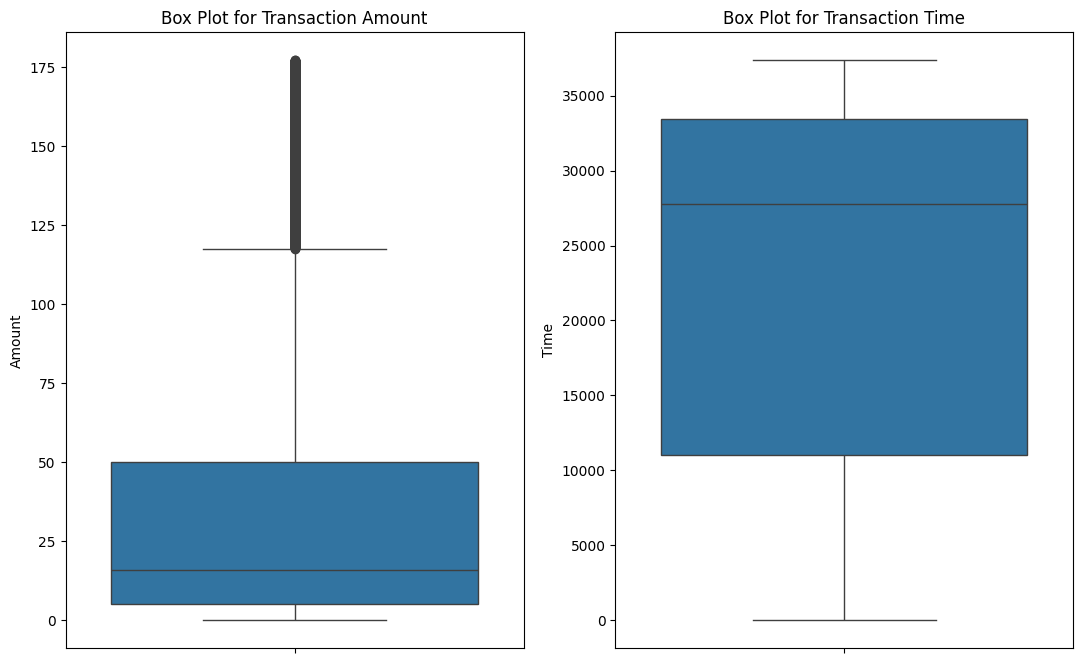

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(13, 8))
sns.boxplot(y='Amount', data=df_clean, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=df_clean, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

In [28]:
features_to_scale=['Amount']
data['Amount'] = np.log(data['Amount'] + 1)

In [29]:
data.shape

(33623, 31)

In [30]:
features = ['V10','V11', 'V12', 'V13', 'V14','V16','V17']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [31]:
data.shape

(33623, 31)

Text(0, 0.5, 'Features')

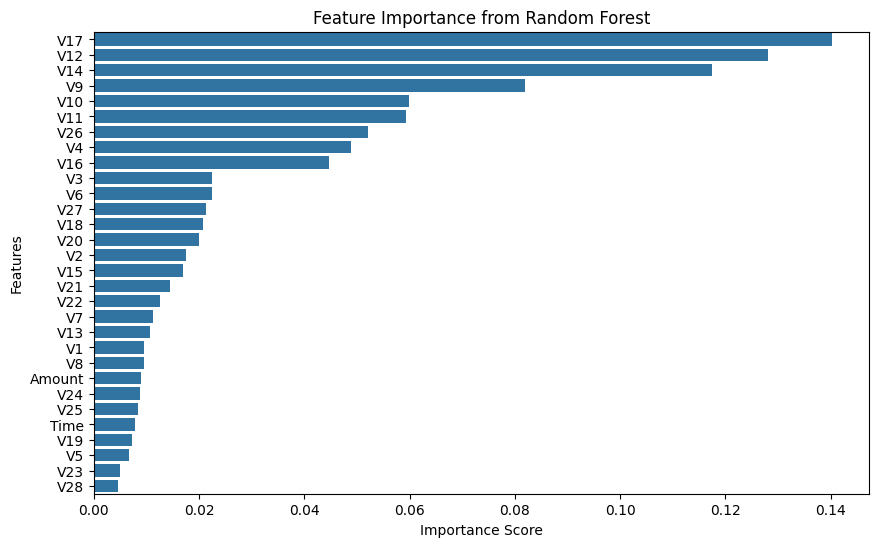

In [35]:

data.replace('-', np.nan, inplace=True)

for feature in data.columns:
    try:
        data[feature] = pd.to_numeric(data[feature])
    except ValueError:
        print(f"Warning: Could not convert column '{feature}' to numeric. Skipping.")


data.dropna(subset=['Class'], inplace=True)


X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')

In [36]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

Class
0.0    33519
Name: count, dtype: int64
Class
1.0    103
Name: count, dtype: int64


In [37]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy=0.6, random_state=42)

In [38]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

Before resampling: Counter({0.0: 23463, 1.0: 72})
After resampling: Counter({0.0: 23463, 1.0: 14077})


In [39]:
data = pd.DataFrame(X_resampled, columns=X.columns)
data['Class'] = y_resampled

In [40]:
data.shape

(37540, 31)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

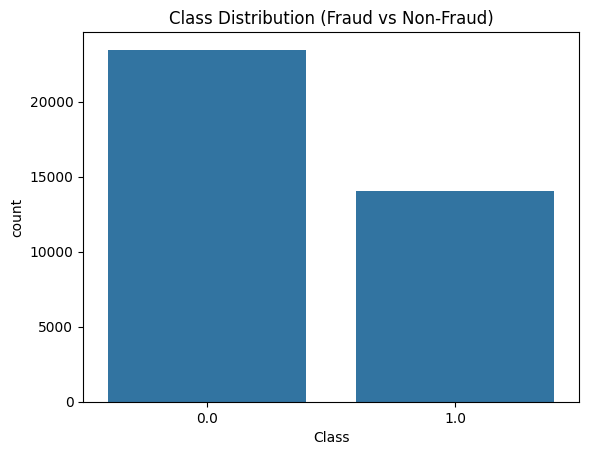

In [41]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

In [42]:
print(data.duplicated().sum())

0


In [43]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

Class
0.0    23463
Name: count, dtype: int64
Class
1.0    14077
Name: count, dtype: int64


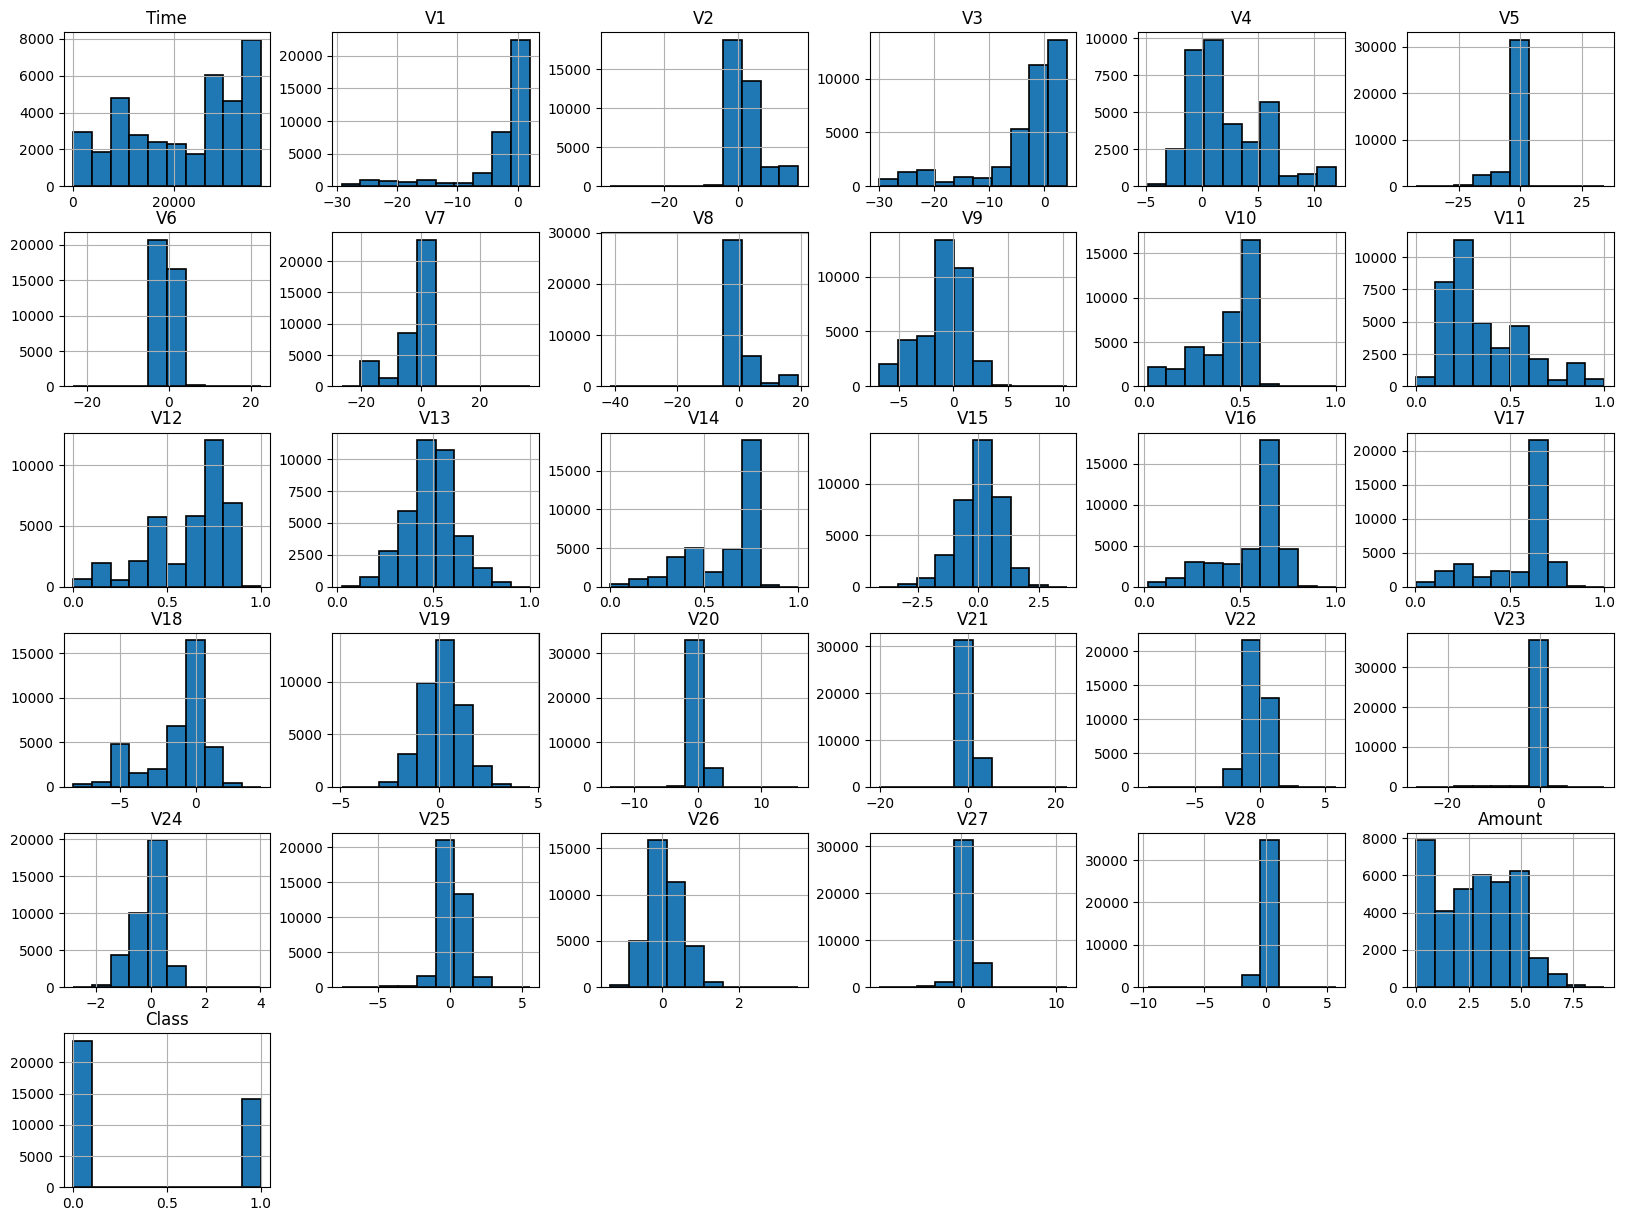

In [44]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

In [45]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l2',
        C=2.0,
        solver='liblinear',
        max_iter=1000
    ),

    "KNearest": KNeighborsClassifier(
         n_neighbors=10,
    ),

    "XGB Classifier": XGBClassifier(
        max_depth=3,
        learning_rate=1,
        n_estimators=9,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1,
        reg_alpha=0.2
    ),

    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=150,
        min_samples_split=25,
        min_samples_leaf=15,
        max_features='sqrt',
        ccp_alpha=0.01
    )
}

In [47]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}\n")

Results for LogisticRegression:
Accuracy: 0.9672
Precision: 0.9740
Recall: 0.9371
F1 Score: 0.9552

Results for KNearest:
Accuracy: 0.9457
Precision: 0.9551
Recall: 0.8966
F1 Score: 0.9249

Results for XGB Classifier:
Accuracy: 0.9989
Precision: 0.9971
Recall: 1.0000
F1 Score: 0.9986

Results for DecisionTreeClassifier:
Accuracy: 0.9747
Precision: 0.9729
Recall: 0.9588
F1 Score: 0.9658



In [48]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Training data
    print(f"Training Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1):.4f}\n")

    # Testing data
    print(f"Testing Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}\n")

Training Results for LogisticRegression:
Accuracy: 0.9667
Precision: 0.9730
Recall: 0.9374
F1 Score: 0.9548

Testing Results for LogisticRegression:
Accuracy: 0.9672
Precision: 0.9740
Recall: 0.9371
F1 Score: 0.9552

Training Results for KNearest:
Accuracy: 0.9485
Precision: 0.9668
Recall: 0.8936
F1 Score: 0.9288

Testing Results for KNearest:
Accuracy: 0.9457
Precision: 0.9551
Recall: 0.8966
F1 Score: 0.9249

Training Results for XGB Classifier:
Accuracy: 0.9997
Precision: 0.9992
Recall: 1.0000
F1 Score: 0.9996

Testing Results for XGB Classifier:
Accuracy: 0.9989
Precision: 0.9971
Recall: 1.0000
F1 Score: 0.9986

Training Results for DecisionTreeClassifier:
Accuracy: 0.9776
Precision: 0.9881
Recall: 0.9518
F1 Score: 0.9696

Testing Results for DecisionTreeClassifier:
Accuracy: 0.9768
Precision: 0.9869
Recall: 0.9504
F1 Score: 0.9683

